# Assignment: Project 3 
# Report on Eroad Dataset

## Instruction

### There are 560,000 records of real-world GPS tracking data in this dataset, which is named Machine data. And there is another dataset about Northern Motorway Road Segments. We will clean and analyse the dataset in this report, then predict some problems. At last we also do some cluster modelling in the second part.

## PART ONE

## 1.Data Wrangling  on Machine Data

### 1.1 Software Environment

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
%matplotlib inline

### 1.2 Read Dataset

#### In this project, we have a lot of datasets. Firstly, we load the datasets from "Machine data.zip": 

In [2]:
zf = zipfile.ZipFile('Machine data.zip') 

#### Secondly, let's integrate them:

In [3]:
df=pd.DataFrame()
for i in zf.namelist():
    if(i!="/"):
        df=df.append(pd.read_csv(zf.open(i),';'))

####  Thirdly, we export the integrated data frame into another file "road events.csv". The progress is quite slow but will be effiency for the future work, because reading the csv file is much more quickly than integrating the datasets above.

In [4]:
df.to_csv("road events.csv")

#### Now we can use the file 'road events.csv' directly:

In [5]:
events_data = pd.read_csv('road events.csv')
events_data.head(3)

,Unnamed: 0,id,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,0,14664310488,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603
1,1,14660741605,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796
2,2,14663873754,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128


#### Let's check the infomation of the dataset:

In [6]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569941 entries, 0 to 569940
Data columns (total 9 columns):
Unnamed: 0             569941 non-null int64
id                     569941 non-null float64
event_timestamp        569941 non-null object
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 43.5+ MB


### 1.3 Delete Columns

#### We're not going to use the columns of "Unnamed: 0" and "id", so we delete them.

In [7]:
events_data=events_data.drop(events_data[[0,1]],1)
events_data.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
0,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603
1,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796
2,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128
3,2015-11-16 03:55:48,153,21564,HEAVY,91,-36.782710,174.749418
4,2015-11-16 08:15:11,52,21564,HEAVY,0,-36.718740,174.712123


### 1.4 Get Day of Week

#### We will predict what day of the week the buses and trucks are driving on, with given their speed, north/south bound direction. So I have to know what day of the week based on the 'event_timestamp'.

#### At first, we change the 'event_timestamp' column to date time type. This progress is quite slow too.

In [8]:
events_data['event_timestamp']=events_data['event_timestamp'].apply(pd.to_datetime)
events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569941 entries, 0 to 569940
Data columns (total 7 columns):
event_timestamp        569941 non-null datetime64[ns]
course_over_ground     569941 non-null int64
machine_id             569941 non-null int64
vehicle_weight_type    569578 non-null object
speed_gps_kph          569941 non-null int64
latitude               569941 non-null float64
longitude              569941 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 34.8+ MB


#### The function 'dayofweek' can get day of the week based on date easily. So we create a column, and put the result into it.

In [9]:
events_data['dayofweek']=events_data['event_timestamp'].dt.dayofweek
events_data.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayofweek
0,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603,0
1,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796,0
2,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128,0
3,2015-11-16 03:55:48,153,21564,HEAVY,91,-36.782710,174.749418,0
4,2015-11-16 08:15:11,52,21564,HEAVY,0,-36.718740,174.712123,0


#### The result is not easy to read. So I need to create a map, and transfer 'dayofweek' from number to name.

In [10]:
mapping = {0:'Monday', 1:'Tuesday', 2:'Wednesday' ,3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
events_data['dayofweek'] = events_data.dayofweek.map(mapping)
events_data.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayofweek
0,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603,Monday
1,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796,Monday
2,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128,Monday
3,2015-11-16 03:55:48,153,21564,HEAVY,91,-36.782710,174.749418,Monday
4,2015-11-16 08:15:11,52,21564,HEAVY,0,-36.718740,174.712123,Monday


### 1.5 North/South Bound

#### Another problem is the north/south direction. We can use the 'course_over_ground' column to decide which direction the vehicle is on.Firstly, we create a function to get the direction. if the angle is from 90 to 270, the direction is south. And the rest of the angle belongs to north direction.

In [11]:
def get_direction(x):
    if(x<90 or x>=270):
        return '0' #North direction
    else:
        return '1' #South direction

#### Apply the function:

In [12]:
events_data['direction']=events_data['course_over_ground'].apply(get_direction)
events_data.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayofweek,direction
0,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603,Monday,1
1,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796,Monday,1
2,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128,Monday,0
3,2015-11-16 03:55:48,153,21564,HEAVY,91,-36.782710,174.749418,Monday,1
4,2015-11-16 08:15:11,52,21564,HEAVY,0,-36.718740,174.712123,Monday,0


## 2.Data Wrangling on Road Segments

#### The 'Northern Motorway Road Segments.csv' file contains information of road. There are 4 kinds of road segment in it: exits,entries,motorway,busway. It can be inferred that if a vehicle runs on the busway, the vehicle should be a bus. The problem is that how to identify the road by coordinates and connect the road to different vehicles. We decide to use kNN to classify the group. But the first step is doing data wrangling on the segments dataset.

#### At first, we read the 'road segments' file, and divide columns by ';'.

In [13]:
Road_Seg=pd.read_csv('Northern Motorway Road Segments.csv',';')
Road_Seg.head()

,id,full_name,road_segment_wkt
0,606114469,Northern Mtwy,"LINESTRING(174.76028 -36.80417,174.76041 -36.8..."
1,606114470,Northern Mtwy,"LINESTRING(174.76043 -36.80419,174.76053 -36.8..."
2,606114471,Northern Mtwy,"LINESTRING(174.76009 -36.80453,174.76028 -36.8..."
3,606114472,Northern Mtwy,"LINESTRING(174.76022 -36.80458,174.76043 -36.8..."
4,605961478,Northern Mtwy,"LINESTRING(174.74429 -36.77469,174.74387 -36.7..."


#### We want to know how many road types the dataset has. We use set function to get the result, then store the result into a list for further progressing.

In [14]:
types=list(set(Road_Seg['full_name']))
types

[nan,
 'Northern Mtwy',
 'Northern Busway',
 '414',
 '417',
 '410',
 '412',
 '421',
 '420',
 '422',
 '419']

#### Based on the 'Data Definitions.txt', Integers represent motorway exits, Motorways are shown as null. It is better to rename them for the further predicting.

#### We need to create another list contain the integers in the dataset. We create a function: if the integers are in the list, they will be renamed to 'Exit'.

In [15]:
exits_list=types[3:11]

#### Create function to rename integers to 'exit':

In [16]:
def get_type(x):
    if(x in exits_list):
        return 'Exit'
    else:
        return x

#### Apply function to rename integers to 'exit':

In [17]:
Road_Seg['full_name']=Road_Seg['full_name'].apply(get_type)
Road_Seg.head()

,id,full_name,road_segment_wkt
0,606114469,Northern Mtwy,"LINESTRING(174.76028 -36.80417,174.76041 -36.8..."
1,606114470,Northern Mtwy,"LINESTRING(174.76043 -36.80419,174.76053 -36.8..."
2,606114471,Northern Mtwy,"LINESTRING(174.76009 -36.80453,174.76028 -36.8..."
3,606114472,Northern Mtwy,"LINESTRING(174.76022 -36.80458,174.76043 -36.8..."
4,605961478,Northern Mtwy,"LINESTRING(174.74429 -36.77469,174.74387 -36.7..."


#### We will use 'fillna' function to fill null data as 'entry'.

In [18]:
Road_Seg['full_name']=Road_Seg['full_name'].fillna('Entry')

#### After the progresses, we want to see types in the dataset.

In [19]:
set(Road_Seg['full_name'])

{'Entry', 'Exit', 'Northern Busway', 'Northern Mtwy'}

#### The function runs very well, and the names are easy to read now.

#### The 'linestring' type in the 'road_segment_wkt' column is not easy to use. Maybe it could be used by some techniques to draw pictures. But in my opinion, it is better to split the 'linestring' to many points. The points should be recorded by two columns:'latitude' and 'longitude', just like data in the 'Machine Data' datasets. It will be quite nice for us to predict what road a vehicle is on based on the points.

#### At first, we delete strings 'LINESTRING(' and ')':

In [20]:
Road_Seg['road_segment_wkt']=Road_Seg['road_segment_wkt'].str.replace('LINESTRING\(','').str.replace('\)','')
Road_Seg.head(4)

,id,full_name,road_segment_wkt
0,606114469,Northern Mtwy,"174.76028 -36.80417,174.76041 -36.80389"
1,606114470,Northern Mtwy,"174.76043 -36.80419,174.76053 -36.80397"
2,606114471,Northern Mtwy,"174.76009 -36.80453,174.76028 -36.80417"
3,606114472,Northern Mtwy,"174.76022 -36.80458,174.76043 -36.80419"


#### As shown in the dataset, the points are separated by ','. So we Split coordinates by ',' and copy them to new rows:

In [21]:
Road_Seg_Map = pd.DataFrame(Road_Seg['road_segment_wkt'].str.split(',').tolist(), index=[Road_Seg.id,Road_Seg.full_name]).stack().reset_index()
Road_Seg_Map=Road_Seg_Map.drop('level_2',1) #Delete useless columns.
Road_Seg_Map.rename(columns={0: 'XY'}, inplace=True) #Rename columns for further progressing
Road_Seg_Map.head()

,id,full_name,XY
0,606114469,Northern Mtwy,174.76028 -36.80417
1,606114469,Northern Mtwy,174.76041 -36.80389
2,606114470,Northern Mtwy,174.76043 -36.80419
3,606114470,Northern Mtwy,174.76053 -36.80397
4,606114471,Northern Mtwy,174.76009 -36.80453


#### The next step is spliting coordinates by space and then copy them into two columns:'latitude' and 'longitude'

In [22]:
Road_Seg_XY=pd.DataFrame(Road_Seg_Map['XY'].str.split(' ').tolist(), index=[Road_Seg_Map.id,Road_Seg_Map.full_name]).reset_index()
Road_Seg_XY.rename(columns={0: 'longitude',1:'latitude'}, inplace=True) #Rename columns
Road_Seg_XY.head()

,id,full_name,longitude,latitude
0,606114469,Northern Mtwy,174.76028,-36.80417
1,606114469,Northern Mtwy,174.76041,-36.80389
2,606114470,Northern Mtwy,174.76043,-36.80419
3,606114470,Northern Mtwy,174.76053,-36.80397
4,606114471,Northern Mtwy,174.76009,-36.80453


#### The result seems quite good. From now on, the two datasets are proper to use for visualisation and prediction.

## 3.Data Visualisation

#### We have two good datasets to solve the problems. First, we can use KDE and CDF to find the density of the road by latitude:

### 3.1 KDE and CDF

In [23]:
import matplotlib
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
matplotlib.style.use('ggplot')

#### You will easily find the traffic on which latitude of the road is worst below:

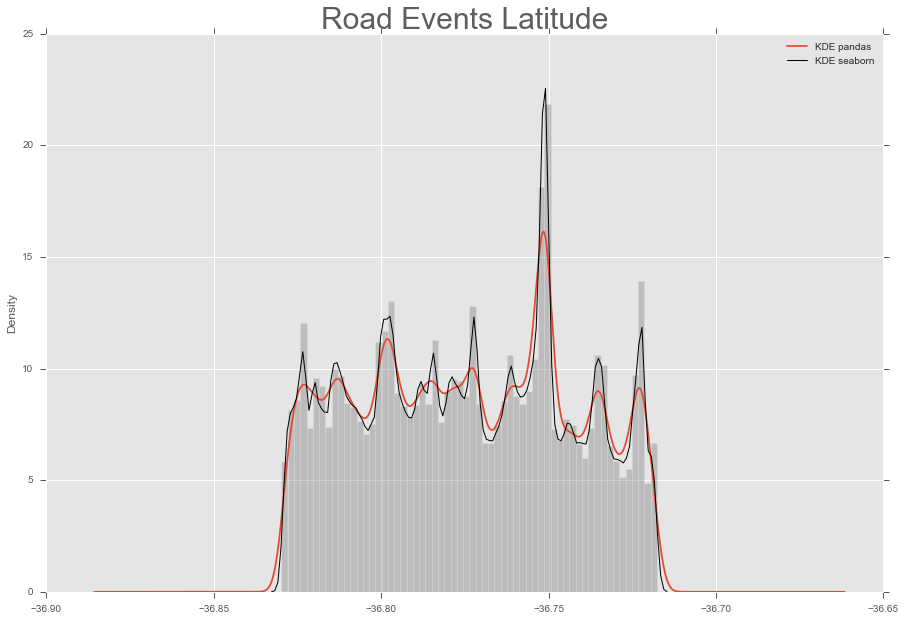

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
events_data.latitude.hist(bins=60, normed=True, alpha=0.4, color='grey')
events_data.latitude.plot(kind='kde', title='Road Events Latitude', label='KDE pandas')
sns.kdeplot(events_data.latitude, bw=0.001, color='black', lw=1.0, label='KDE seaborn')
plt.title('Road Events Latitude', alpha=0.75, fontsize=30)

#### The higher the bar is, the worse the trafic is. It's clear that there are often a lot of cars on -36.75, and the traffic on the other high points is often bad too. The eye is much better at judging distances than area, so we can see it clearly on CDF:

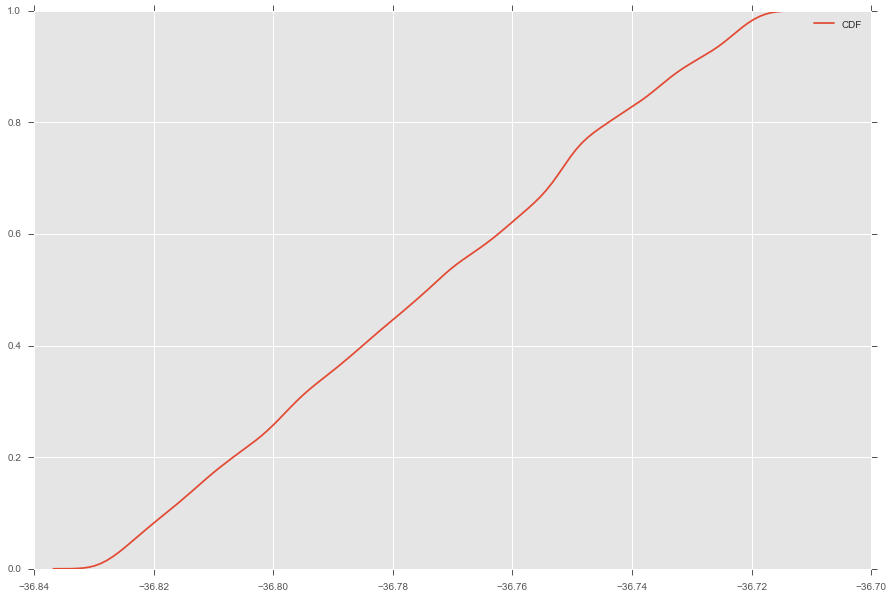

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(events_data.latitude, cumulative=True, label='CDF')

#### As can be seen from the line chart, -36.75 is the biggest problem. But where is it exactly? No problem. You can find it easily on the map which I will show you later.

### 3.2 Speed Analysis

#### We all know the speed is very important for the Eroad because it means efficiency. Let's make a definition to judge the directions of the vehicles and then see the speed situation in different directions:

(0, 150)

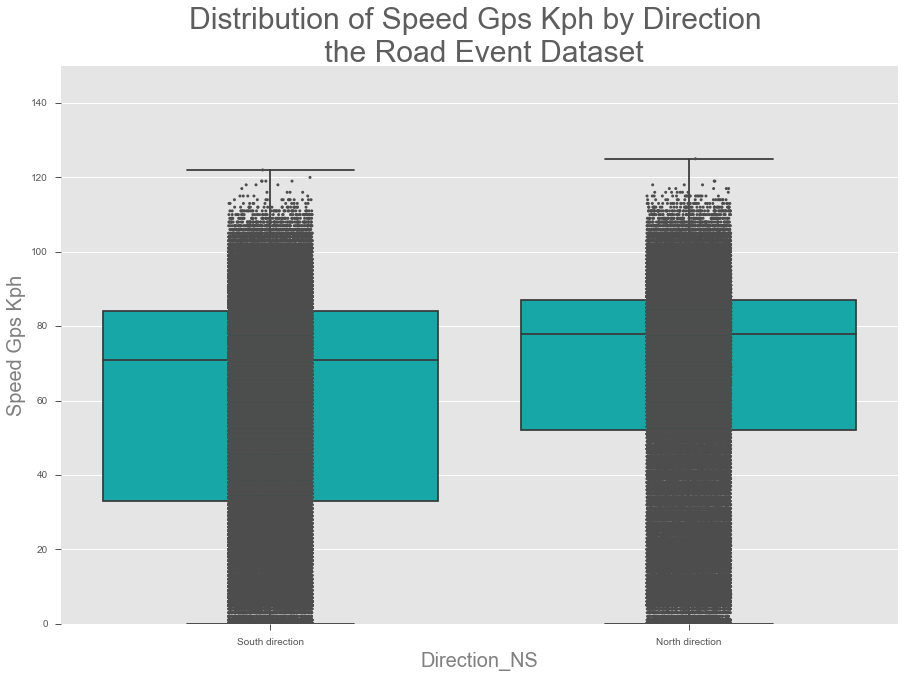

In [26]:
direction_data=events_data
def tran_direction(x):
    if(x<90 or x>=270):
        return 'North direction'
    else:
        return 'South direction'
direction_data['direction_NS']=direction_data['course_over_ground'].apply(tran_direction)    

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="direction_NS", y="speed_gps_kph", data=direction_data, color="c")

sns.stripplot(x="direction_NS", y="speed_gps_kph", data=direction_data,
              jitter=True, size=3, color=".3", linewidth=0)

sns.despine(left=True, bottom=True)

plt.ylabel('Speed Gps Kph', alpha=0.75, fontsize=20)
plt.xlabel('Direction_NS', alpha=0.75, fontsize=20)
plt.title('Distribution of Speed Gps Kph by Direction \n the Road Event Dataset', alpha=0.75, fontsize=30)
plt.ylim([0,150])

#### It's clear that the speed of north direction is much higher than that of soutn direction. But is it true for everyday? Is there any difference between weekdays and weekends? Now we can use another plot to show it:

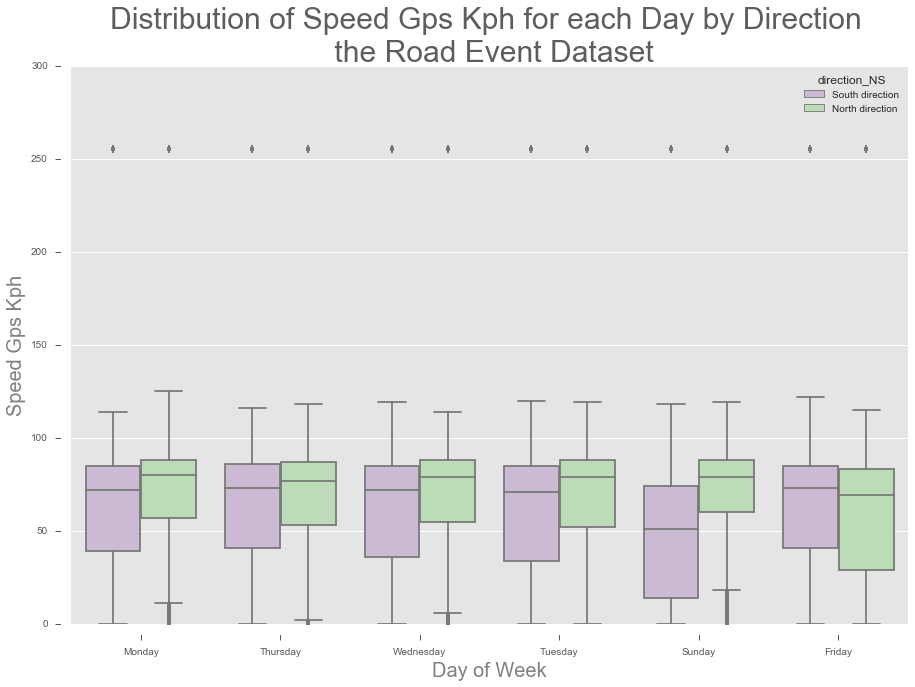

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="dayofweek", y="speed_gps_kph", hue="direction_NS", data=direction_data, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title('Distribution of Speed Gps Kph for each Day by Direction \n the Road Event Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Speed Gps Kph', alpha=0.75, fontsize=20)
plt.xlabel('Day of Week', alpha=0.75, fontsize=20)

#### As we can see from the plot, the speed of south direction on Friday is higher than that of north direction. And the speed situation on Sunday is very extreme -- the speed of south direction is the slowest and the speed of north direction is the highest.

#### We know that the vehicle weight type is also important for efficiency. Is it different between the heavy vehicles and the light vehicles? Let's find the answer below:

(0, 150)

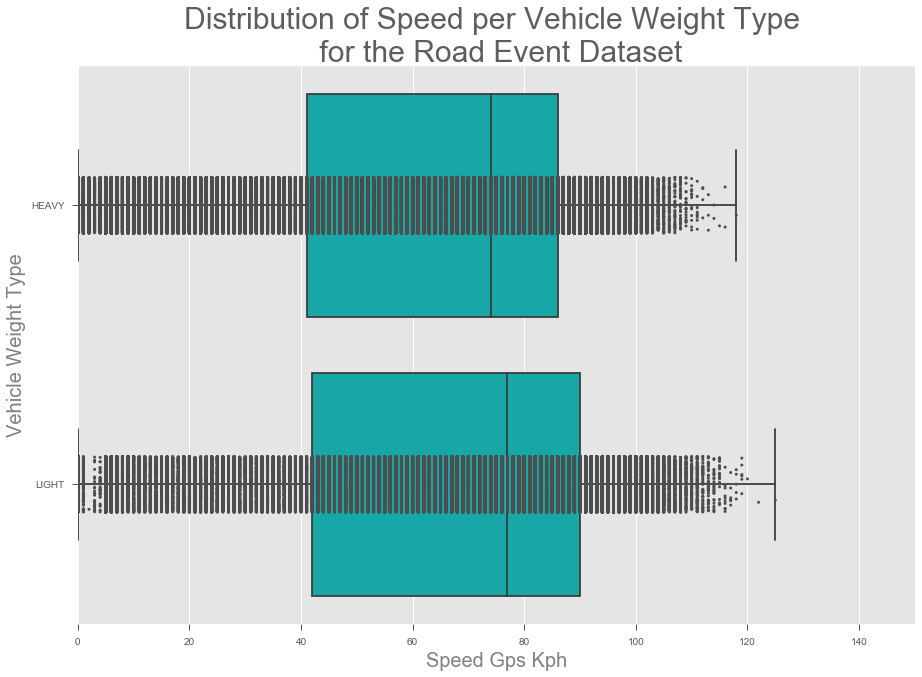

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="speed_gps_kph", y="vehicle_weight_type", data=events_data, color="c", orient='h')

sns.stripplot(x="speed_gps_kph", y="vehicle_weight_type", data=events_data,
              jitter=True, size=3, color=".3", linewidth=0, orient='h')

sns.despine(left=True, bottom=True)

plt.ylabel('Vehicle Weight Type', alpha=0.75, fontsize=20)
plt.xlabel('Speed Gps Kph', alpha=0.75, fontsize=20)
plt.title('Distribution of Speed per Vehicle Weight Type \n for the Road Event Dataset', alpha=0.75, fontsize=30)
plt.xlim([0,150])

#### As we can see from the plot above, the speed of the light vehicles is a little higher than that of the heavy vehicles. But why? Is it means that light vehicles are more efficient? Now let's find the answers on the violin plot below:

(0, 150)

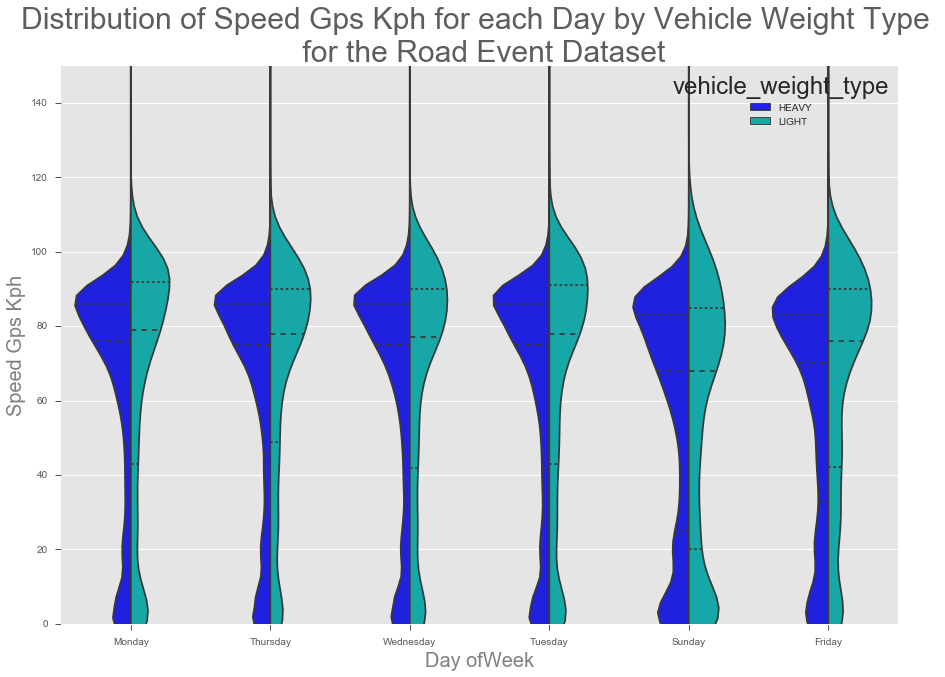

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
rcParams['font.size'] = 20
sns.violinplot(ax=ax, x="dayofweek", y="speed_gps_kph", hue="vehicle_weight_type", data=direction_data, split=True,
               inner="quart", palette={"HEAVY": "b", "LIGHT": "c"})
sns.despine(left=True)
plt.title('Distribution of Speed Gps Kph for each Day by Vehicle Weight Type \n for the Road Event Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Speed Gps Kph', alpha=0.75, fontsize=20)
plt.xlabel('Day ofWeek', alpha=0.75, fontsize=20)
plt.ylim([0,150])

#### It's clear that there are lots of light vehicles' speed are higher than 100 kph. That means sometimes the light vehicle drivers exceeds the speed limit! It's not only unefficient, but also dangerous! I think Eroad should remind the drivers not to do that wrong things.

### 3.3 Map Show

#### After read lots of my discussion maybe you want to know what the roads looks like? We can easily make the map by IDs in the dataset:

(174.635, 174.845)

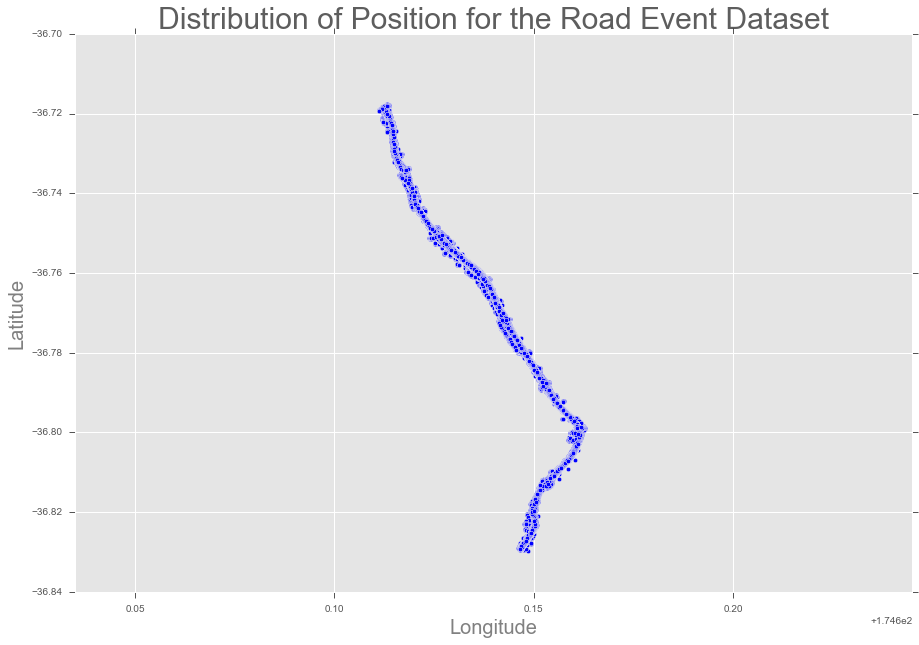

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(direction_data.longitude, direction_data.latitude)
plt.title('Distribution of Position for the Road Event Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Latitude', alpha=0.75, fontsize=20)
plt.xlabel('Longitude', alpha=0.75, fontsize=20)
plt.xlim([174.635,174.845])

#### But the map above is not very clearly. No problem we have another "Northern Motorway Road Segments.csv" dataset. We can use "plt.plot(x,y,color)" to make it.

#### Firstly we need make the x lable. We need two loops to get the "road_longitude" column:

In [31]:
NMRS_Data = Road_Seg

road_longitude_list = []

for x in NMRS_Data.index:
    y = NMRS_Data.ix[x]['road_segment_wkt']
    location = str.split(y, ',')
    
    longitude = []

    for z in location:
        location = str.split(z, ' ')
        longitude.append(location[0])

    road_longitude_list.append(longitude)

NMRS_Data['road_longitude']=road_longitude_list
NMRS_Data.head(4)

,id,full_name,road_segment_wkt,road_longitude
0,606114469,Northern Mtwy,"174.76028 -36.80417,174.76041 -36.80389","[174.76028, 174.76041]"
1,606114470,Northern Mtwy,"174.76043 -36.80419,174.76053 -36.80397","[174.76043, 174.76053]"
2,606114471,Northern Mtwy,"174.76009 -36.80453,174.76028 -36.80417","[174.76009, 174.76028]"
3,606114472,Northern Mtwy,"174.76022 -36.80458,174.76043 -36.80419","[174.76022, 174.76043]"


#### Secondly we need make the y lable. We also use two loops to get the "road_latitude" column:

In [32]:
road_latitude_list=[]

for x in NMRS_Data.index:
    y = NMRS_Data.ix[x]['road_segment_wkt']
    location = str.split(y, ',')
    
    latitude = []

    for z in location:
        location = str.split(z, ' ')
        latitude.append(location[1])

    road_latitude_list.append(latitude)

NMRS_Data['road_latitude']=road_latitude_list
NMRS_Data.head(4)

,id,full_name,road_segment_wkt,road_longitude,road_latitude
0,606114469,Northern Mtwy,"174.76028 -36.80417,174.76041 -36.80389","[174.76028, 174.76041]","[-36.80417, -36.80389]"
1,606114470,Northern Mtwy,"174.76043 -36.80419,174.76053 -36.80397","[174.76043, 174.76053]","[-36.80419, -36.80397]"
2,606114471,Northern Mtwy,"174.76009 -36.80453,174.76028 -36.80417","[174.76009, 174.76028]","[-36.80453, -36.80417]"
3,606114472,Northern Mtwy,"174.76022 -36.80458,174.76043 -36.80419","[174.76022, 174.76043]","[-36.80458, -36.80419]"


#### Thirdly, we can make the road colors. I will make Northern Mtwy blue, make Busway red and make the other roads white:

In [33]:
road_name=NMRS_Data.full_name.unique()
colors=["blue", 'white', 'white', 'red']

def find_busway(fullname):
    for x in range(road_name.size):
        if road_name[x]==fullname:
            return colors[x]
        else: 
            'white'

#### Now let's get the map we want:

(174.635, 174.845)

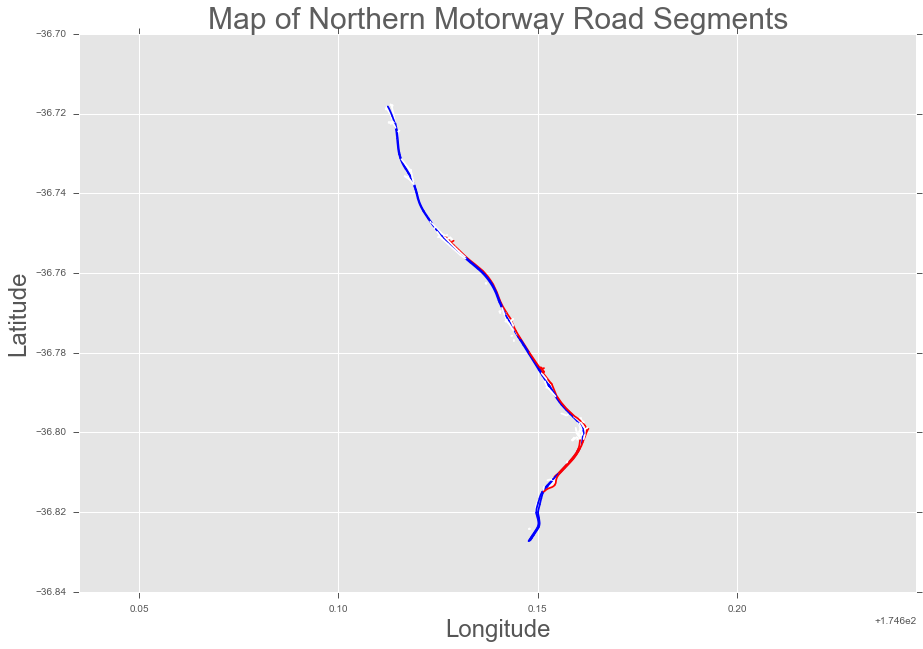

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
for i in NMRS_Data.index:
    x=NMRS_Data.ix[i]['road_longitude']
    y=NMRS_Data.ix[i]['road_latitude']
    fullname=NMRS_Data.ix[i]['full_name']
    color = find_busway(fullname)
    plt.plot(x, y, color)
plt.title('Map of Northern Motorway Road Segments', alpha=0.75, fontsize=30)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.xlim([174.635,174.845])

#### We know only the buses can use the Busway, so the vehicles which use the busway will be the buses, and the others are trucks. And you can find that the busways are usually on the right side of the Northern Mtwy, that is very important in the prediction part.

#### Do you still remember each bad traffic latitude point in 2.1 part of the report? You can find them by latitude easily on the map above.

### 3.4 Weather API

#### Weather is very very useful for Eroad, and I will tell you why later. First, we need to find a good Weather API source. The good news is that there are a lot of good weather API suppliers, but the bad news is that they are not free for us. For example, http://openweathermap.org/api has the excellent weather data, but we need to pay over 950 USD to make it. So we can only show how to use it and what can we get if we buy the weather data.

#### API call:
http://api.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}
http://api.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&cnt={cnt}

#### Parameters:
#### lat, lon: coordinates of the location of your interest
#### type: type of the call, keep this parameter in the API call as 'hour'
#### start: start date (unix time, UTC time zone)
#### end: end date (unix time, UTC time zone)
#### cnt: amount of returned data (one per hour, can be used instead of 'end')

#### Dynamic Traffic Map: We can use the weather data to evaluate the climate influence to the traffic. Then we can use the result to predict the traffic situation by climate change in the future and prepare the traffic solutions before the traffic problem happens.

## 4.Predictive Modelling

### 4.1 Predict Day of Week (kNN)

#### We have a very good dataset which can do loads of predictive modelling work. For example, can we predict what day of the week the buses and trucks are driving on, given their speed, north/south bound direction? No problem, we can use kNN to make it.

####  Let's create a train_test list:

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(events_data[['speed_gps_kph','direction']], events_data['dayofweek'], random_state=1, test_size=0.4)

print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(341964, 2)
(227977, 2)
(341964L,)
(227977L,)


#### Firstly, import the class we plan to use:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#### Secondly, instantiate the model, we choose the k of 5:

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#### Thirdly, fit the model with data (learn the relationship between X and y):

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.18682147760519702

#### Now we can generate a more comprehensive accuracy report:

In [40]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

     Friday       0.10      0.16      0.12     19550
     Monday       0.21      0.32      0.25     46227
     Sunday       0.12      0.09      0.10     23295
   Thursday       0.21      0.13      0.16     45473
    Tuesday       0.21      0.16      0.18     45969
  Wednesday       0.21      0.19      0.20     47463

avg / total       0.19      0.19      0.18    227977



#### It seems that the accuracy is not high. But we can see it deeper. It seems that it predicts worst on Sunday, only 0.1 accuracy. However, it predicts best on Monday, which is more than twice of that on Sunday. From my point of view, the pattern on Sunday may be similar to some other days, it is hard to distinguish it by kNN. And the pattern on Monday is likely to be easier to distinguish.

### 4.2 Identify Vehicle Types (kNN)

#### Because the decision boundary is very irregular, kNN classifier is a effective way to classifier the kind of the vehicle.

#### Create a model to identify vehicle by coordinates. The data of the model comes from 'Road Segment' dataset. The X of the model is the coordinates of different points of road, the y of the model is the name of the road.

#### Here is the first step, we will set X and y, then check the shape of them.

In [41]:
# create X (features)
X = Road_Seg_XY[['latitude', 'longitude']]

# create y (response)
y = Road_Seg_XY.full_name

# check the shape of X and y
print X.shape     # 1585 by 2 (n=1585, p=2)
print y.shape     # 1585 (must match first dimension of X)

(1585, 2)
(1585L,)


#### Then, we will import KNeighborsClassifier to create the model. Here is the question: what is the best number for k ? the number of k is set to 5 firstly. We're not sure whether it is the best one. After this progress, we will create a function to find out the best option of k.

In [42]:
# scikit-learn 4-step modeling pattern:

# Step 1: import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

# Step 2: instantiate the model
# note: all unspecified parameters are set to the defaults
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

#### The third step is to fit the model with X and y.

In [43]:
# Step 3: fit the model with data (learn the relationship between X and y)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Does the model work? We will use the data on the first row to test the model. The latitude is -36.80417 while the longitude is 174.76028, and the result should be "Northern Mtwy".

In [44]:
# Step 4: use the "fitted model" to predict the response for a new observation
X_new = [[-36.80417, 174.76028]]
res = knn.predict(X_new)
print res

['Northern Mtwy']


#### It seems that the model can give a good answer. But there is only one result, how about the other ones? And how to find out the best option for k? It is not a regression problem. From my point of view, I can make a comparison between the predict results and the right results in the dataset. We will create a function, the parameter of the which is the **predict result** list. The function will compare the values in the list to the results in dataset one by one. If the two results are equal, it should be a good prediction. At last, we can get the rate of good results and ragard it as "goodness of fit".

In [45]:
def calculate_classfier_goodness_of_fit(result_list):
    total_count=len(y) #Number of total results
    good_fit=0
    bad_fit=0
    for i in range(len(y)): #make comparisons
        if(y[i]==result_list[i]): #If they are equal
            good_fit+=1
    return float(good_fit)/float(total_count)*100 #return the rate of good results

#### After creating the function, It is ready to decide which k should be choose. We use loop to generate a list which contains different rates of good results about choosing different k.

In [46]:
goodness_arr=[]
for k in range(2, 100):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    result_list = knn.fit(X, y).predict(X)
    goodness_arr.append(calculate_classfier_goodness_of_fit(result_list))

#### To make the result easier to read, we create a diagram to see the trend for different k.

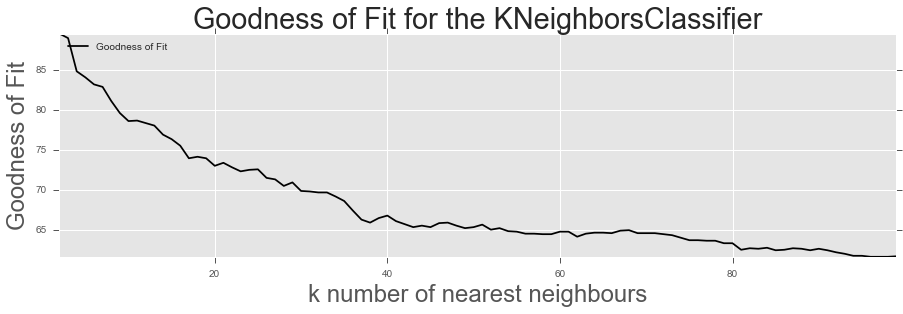

In [47]:
flg, ax=plt.subplots(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.plot(range(2, 100), goodness_arr, c='k', label='Goodness of Fit')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('Goodness of Fit')
plt.legend(loc='upper left')
plt.title("Goodness of Fit for the KNeighborsClassifier")
plt.subplots_adjust( hspace=0.5)

#### From the diagram, we can infer that the best choice for k is 2. The goodness of fit is nearly 90% on 2. So we decide to change the k to 2.

In [48]:
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [49]:
res = knn.predict(X_new)
print res

['Northern Mtwy']


### 4.3 Predict the Direction by Speed and Time (Naive Bayes)

#### There are speed column and timestamp column in the dataset, can we predict the vehicles' direction now? Yes, we can use Gaussian Probability Density Function (PDF) to make it. Now we will use "direction_data" dataset:

In [50]:
direction_data.head(3)

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude,dayofweek,direction,direction_NS
0,2015-11-16 08:22:18,153,21564,HEAVY,77,-36.776549,174.745603,Monday,1,South direction
1,2015-11-16 03:56:59,142,21564,HEAVY,88,-36.796810,174.759796,Monday,1,South direction
2,2015-11-16 07:29:33,324,21564,HEAVY,81,-36.751055,174.726128,Monday,0,North direction


#### To make it easily, I use a definition "direction_judge(x,T)". x is the given speed and T is the given time of the day.

#### To predict the vehicles' direction, we need to find the different speeds' list at the given time. Then we can coculate the mean and std of the list for the PDF.

In [51]:
def direction_judge(x,T):
    def pdf_gaussian(x, mean, std):
        return(1/(std*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mean)/std)**2)) # Gaussian Probability Density Function
    list_north = [] # List for the speeds of north direction at the given time
    list_south = [] # List for the speeds of south direction at the given time
    for i in range(len(direction_data)): # Loop for finding the speeds at the given time
        if direction_data.ix[i,'event_timestamp'] == pd.to_datetime(T):
            if direction_data.ix[i,'direction'] == "0":
                list_north.append(direction_data.ix[i,'speed_gps_kph'])
            else:
                list_south.append(direction_data.ix[i,'speed_gps_kph'])
        else:
            pass
    list_north_mean = np.mean(list_north) # Mean value of the north speeds
    list_north_std = np.std(list_north) # Std value of the north speeds
    list_south_mean = np.mean(list_south) # Mean value of the south speeds
    list_south_std = np.std(list_south) # Std value of the south speeds
    p_north = pdf_gaussian(x, list_north_mean, list_north_std) # Gaussian probability density (North direction)
    p_south = pdf_gaussian(x, list_south_mean, list_south_std) # Gaussian probability density (South direction)
    if p_north > p_south: # The bigger value means more possible.
        print "North Direction!"
    else:
        print "South Direction!"
    print "PDF Gaussian (North) is", p_north
    print "PDF Gaussian (South) is", p_south
    print "North Speeds at given time:", list_north
    print "South Speeds at given time:", list_south

#### Now we can try our definition. For example, if the given speed is 85, the directions may be different at the different time:

#### If the time is at "2015-11-17 18:12:03":

In [52]:
x = 85 # The given speed
T = '2015-11-17 18:12:03' # The given time
direction_judge(x,T)

North Direction!
PDF Gaussian (North) is 0.0227581669455
PDF Gaussian (South) is 7.77449787196e-164
North Speeds at given time: [87, 67, 70]
South Speeds at given time: [0, 6]


#### You can find that there are 5 values at the given time: 87, 67 and 70 for north direction, 0 and 6 for the south direction. The north possibility density is much higher than the south possibility density, so we predict the sample is north direction.

#### If the same given speed at "2015-11-19 02:11:40":

In [53]:
x = 85 # The given speed
T = '2015-11-19 02:11:40' # The given time
direction_judge(x,T)

South Direction!
PDF Gaussian (North) is 6.22509126401e-133
PDF Gaussian (South) is 0.00888649504655
North Speeds at given time: [21, 26]
South Speeds at given time: [65, 80, 56, 74]


#### At this given time the north direction traffic is very bad. The result of our definition is south direction.

## PART TWO

## 5.Cluster Modelling

### 5.1 Cluster the Vehicles into Trucks or Buses Groups

#### We want to find out the clusters by coordinates, because we think there should have some differences between their routes.

#### The first step is to find out the centroid of different vehicles. Then cluster the centroid.

In [54]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

#### Using groupby function to get the mean of latitude and longitude.

In [55]:
road_centroid=events_data['latitude'].groupby(events_data['machine_id']).mean().to_frame()
road_centroid['longitude']=events_data['longitude'].groupby(events_data['machine_id']).mean()
road_centroid.head()

,latitude,longitude
machine_id,,
311,-36.775003,174.739594
338,-36.781812,174.742886
354,-36.775527,174.740172
360,-36.819122,174.750694
390,-36.773457,174.739243


#### Normalization the data:

In [56]:
minmax_scale = preprocessing.MinMaxScaler().fit(road_centroid[['latitude','longitude']])
road_centroid[['latitude','longitude']] = minmax_scale.transform(road_centroid[['latitude','longitude']])

#### Create Cluster Model by kMeans. The parameters are 'longitude' and 'latitude'. Because we have already know that there are two kinds of vehicles, buses and trucks. The number of k should be set to 2.

In [57]:
km = KMeans(n_clusters=2, init='random')
km.fit(road_centroid[['longitude','latitude']].values)
predictions=km.predict(road_centroid[['longitude','latitude']].values)

#### Show the result below.

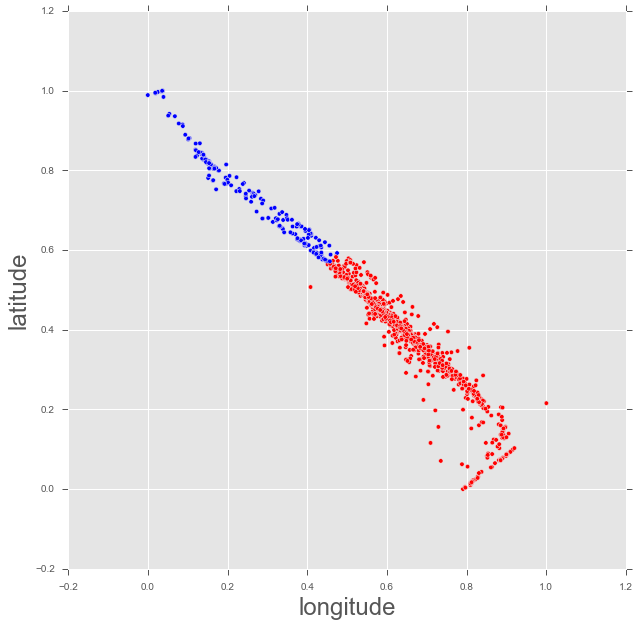

In [58]:
colors = np.array(['blue', 'red'])
flg, ax=plt.subplots(figsize=(10,10))
plt.scatter(road_centroid.ix[:,'longitude'], road_centroid.ix[:,'latitude'],c = colors[predictions], s=20)
ax.set_xlabel(road_centroid.columns[1])
ax.set_ylabel(road_centroid.columns[0])

#### From the map in the third part, we know the Bus Way is on the right side of the , so the right cluster is belong to bus. There are more points of buses.

### 5.2 Find day of week without bus/truck labels

### 5.2.1Using Centroids to Identify

#### At first, we want to find out the centroids of different routes. The routes are distinguished by different machines on different days.

#### At first, we create a new dataframe 'road_centroid_week' to store the coordinates and use group function to get data from the 'events_data' dataframe by 'machink_id' and 'week_num' .

In [59]:
events_data['week_num']=events_data['event_timestamp'].dt.dayofweek
road_centroid_week=events_data.groupby(['machine_id','week_num']).mean().latitude.to_frame()
road_centroid_week['longitude']=events_data.groupby(['machine_id','week_num']).mean().longitude
road_centroid_week.reset_index(level=['week_num'],inplace=True)
road_centroid_week
set(road_centroid_week['week_num'].values)

{0, 1, 2, 3, 4, 6}

#### Normalization:

In [60]:
minmax_scale = preprocessing.MinMaxScaler().fit(road_centroid_week[['latitude','longitude']])
road_centroid_week[['latitude','longitude']] = minmax_scale.transform(road_centroid_week[['latitude','longitude']])

#### Let's figure out the diagram. The red points are the six centroids of routes on six days. The other smaller points are distinguished by different colors. These points mean centroids of routes grouped by vehicles.

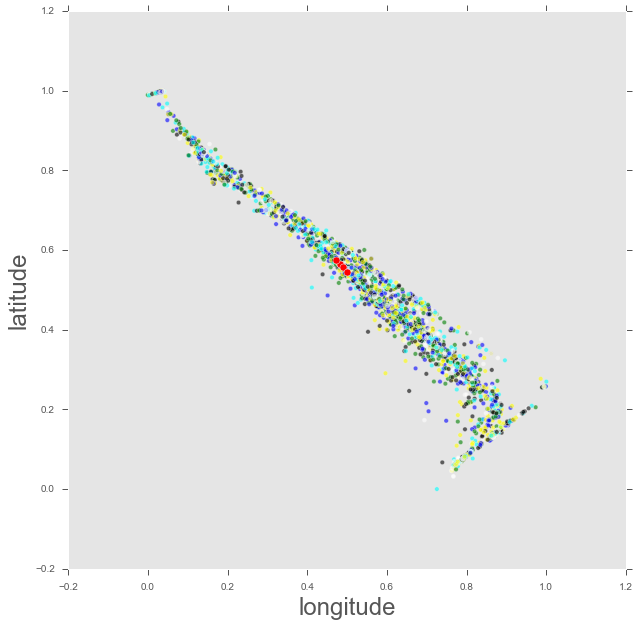

In [61]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.grid()

colors = np.array(['green', 'black','blue','yellow','white','cyan','cyan'])
axes.scatter(road_centroid_week.ix[:,'longitude'], road_centroid_week.ix[:,'latitude'],c=colors[road_centroid_week['week_num']],alpha=0.6,s=20)
axes.scatter(road_centroid_week.groupby('week_num').mean().latitude, road_centroid_week.groupby('week_num').mean().longitude,c=['red'],s=50)
axes.set_xlabel('longitude')
axes.set_ylabel('latitude')

#### The six points are quite near, maybe it is not reliable.

### 5.2.2 Using speed to Identify

#### The next assumption is based on speed of different days. Maybe the speed should be different on different days.

#### Let's Create a new dataframe to get the speed.

In [62]:
speed_data=events_data.set_index('event_timestamp')

#### Then plot the date. Different lines in the diagram represent speed on different days. The X-axis means hours of the day while the Y-axis means average speed per hour.

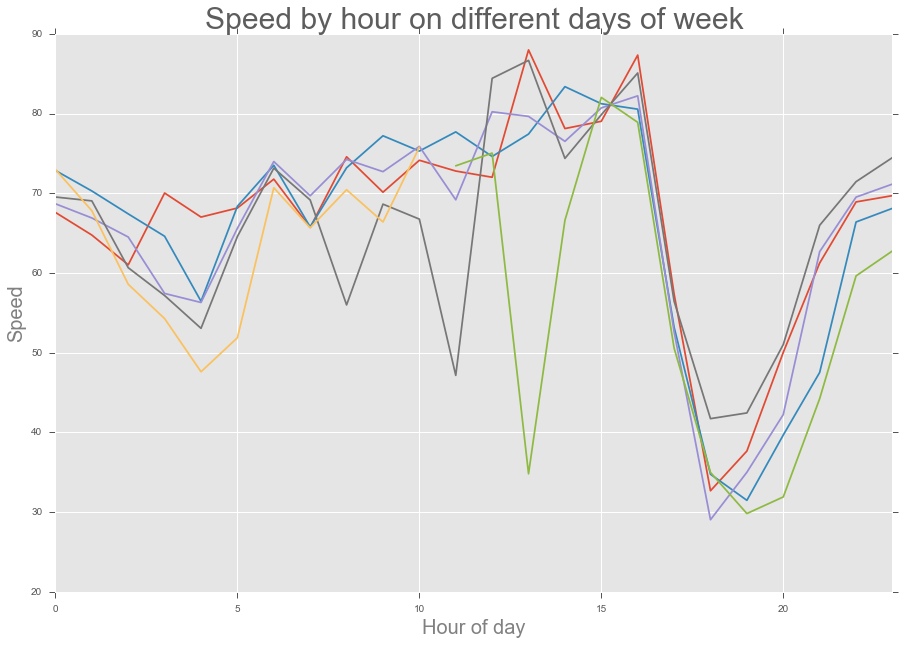

In [63]:
fig, axes = plt.subplots()
fig.set_size_inches(15,10)
for i in set(speed_data.week_num):
    df=speed_data[(speed_data.week_num==i) & (speed_data.direction=='1')]
    df.groupby([df.index.hour]).speed_gps_kph.mean().plot(label='Goodness of Fit')

plt.title('Speed by hour on different days of week', alpha=0.75, fontsize=30)
plt.xlabel('Hour of day', alpha=0.75, fontsize=20)
plt.ylabel('Speed', alpha=0.75, fontsize=20)

#### We can see the diagram more exactly by changing the X-axis. Now we can see into different minutes, and find out the patterns.

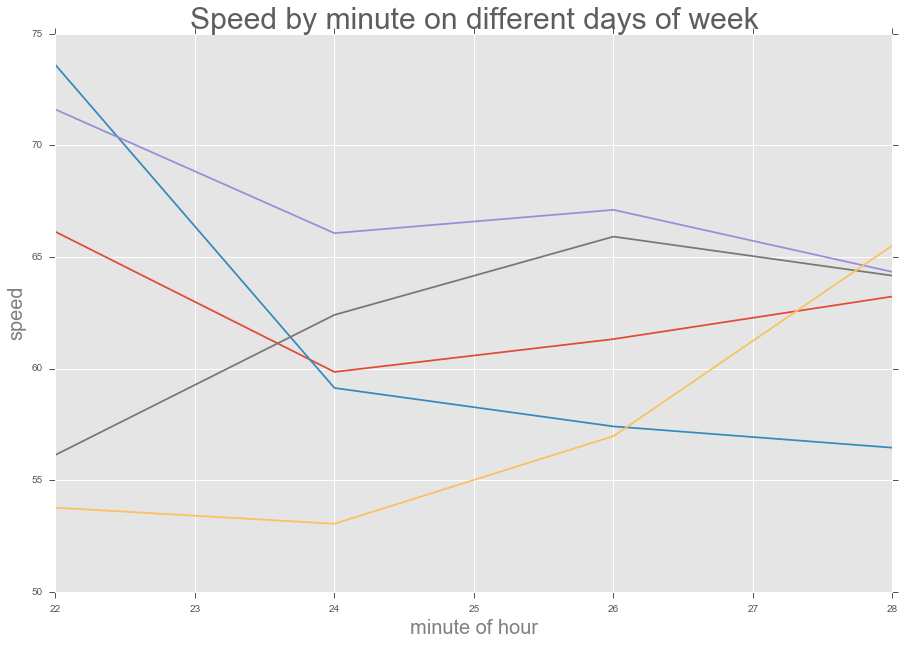

In [64]:
fig, axes = plt.subplots()
fig.set_size_inches(15,10)
for i in [0,1,2,3,6]:
    df=speed_data[(speed_data.direction=='0')&(speed_data.week_num==i)&(speed_data.index.hour==19)&(10 < speed_data.index.minute) & (speed_data.index.minute<15)]
    df.groupby([df.index.minute*2]).speed_gps_kph.mean().plot()  
    
plt.title('Speed by minute on different days of week', alpha=0.75, fontsize=30)    
plt.xlabel('minute of hour', alpha=0.75, fontsize=20)
plt.ylabel('speed', alpha=0.75, fontsize=20)

#### We have tried to change the line chart on different time scale. We found something interesting, there are no data on the morning of Friday. And it is not easy to find the difference. We found that traffic patterns for the vehicles are not distinct enough that they cluster into different days of the week.

In [65]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check');
});

<IPython.core.display.Javascript object>

# Conclusion

### The data in this report comes from Eroad. After data wangling, we tried to analyse the dataset and predicted some problems. And we found some useful conclusion:
### 1. We used KDE and CDF to find some road segments where the traffic jams often happen.
### 2. We analysed the speed data, then found that the speed situation on Sunday is very extreme -- the speed of south direction is the slowest and the speed of north direction is the highest.
### 3. We analysed the speed and weight type data, and found that sometimes the light vehicle drivers exceeds the speed limit!
### 4. We used Northern Motorway Road Segment file to make a road map, and found the busways are usually on the right side of the Northern Mtwy.
### 5. We used kNN to predict what day of the week the buses and trucks are driving on, given their speed, north/south bound direction.
### 6. We used kNN to predict if the readings are for a bus or a truck.
### 7. We used Naive Bayes to predict the Direction by Speed and Time.
### 8. We used Cluster Modelling to accurately cluster the vehicles into distinct groups that describe trucks and buses without using bus/truck labels.
### 9. We found traffic patterns for the vehicles are not distinct enough that they cluster into different days of the week.

# Thank you! :)